# Bellman-Ford

Este algoritmo resuelve el problema de encontrar los camnios más cortos desde un vértice a todos los demás en una gráfica cuyos pesos podrían ser negativos. Esta es una ventaja frente al algoritmo del documento pasado, Dijkstra, que sólo funciona si no hay pesos negativos.

Se utiliza la técnica de relajación,el proceso de relajar una arista consiste en probar si podemos mejorar el camino hacia un vértice v pasando por el vértice u y si es que se puede mejorar, actualizarlo. Para poder hacer la relajación, primero hay que incializar la gráfica para tener un valor inicial contra el cual vamos a comparar.

El pseudo algoritmo que vamos a usar como referencia para esta función es el siguiente, el cual ya vimos en el documento pasado de Dijkstra (Cormen, p. 648):
<br>
<img src="./img/dijksta_initialize_single_source.jpeg" alt="Pseudocodigo Initialize Single Source" />

In [41]:
def initialize_single_source(A, s):
    n, inf = len(A), float("inf")
    v = range(n)
    
    distancias = [inf for _ in v]
    distancias[s] = 0
    
    return distancias

<h4>Función Relax</h4>

Al igual que en Dijkstra, vamos a realizar el proceso descrito anterioirmente (el de rejalación), el cual es probar si podemos mejorar el camino hacia un vértice v pasando por el vértice u y si es que se puede mejorar, actualizarlo. En otras palabras es verificar si el camino que tenemos actualmente es el más corto posible o si hay otro camino, pasando por otro vértice u que puede ser más corto al que tenemos actualmente.

El pseudo algoritmo que vamos a usar como referencia para esta función es el siguiente (Cormen, p. 649):
<br>
<img src="./img/pseudo_relax.jpeg" alt="Pseudocodigo Relaxation" />

In [42]:
def relax(u, v, peso, distancias):
    if distancias[v] > distancias[u] + peso:
        distancias[v] = distancias[u] + peso

Ya que tenemos las dos funciones anteriores, podemos implementar la función bellman-ford la cual utliza en su funcionamiento a initialize_single_source y relax.

El algoritmo Bellman-Ford regresa un valor booleano que indica si hay un ciclo de peso negativo que es alcanzable desde el vértice del que partimos. Si existe este ciclo, entonces el algoritmo indica que no hay solución. Si no existe dicho ciclo, entonces el algoritmo produce los caminos más cortos y sus pesos.

La siguiente imagen muestra el pseudocódigo del algoritmo

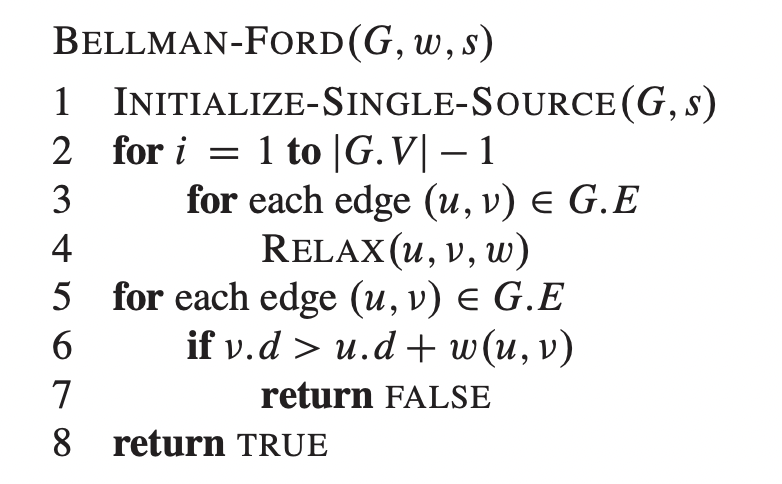

El algoritmo relaja las aristas y progresivamente reduce la estimación en el peso de la ruta más corta desde el vértice fuente hasta cada otro vértice.

In [43]:
def bellman_ford(A, s):
    n = len(A)
    v = range(n)
    distancias = initialize_single_source(A, s)
    
    # Hacemos un ciclo que se ejecute |G.V| - 1
    for _ in range(n - 1):
        for i in v:
            for j in v:
                peso = A[i][j]
                relax(i, j, peso, distancias)
    
    for i in v:
        for j in v:
            peso = A[i][j]
            
            if distancias[j] > distancias[i] + peso:
                return False
            
    return True

<h3>Prueba del algortimo</h3>
Se va a correr el algoritmo para verficiar que funcione correctamente

In [44]:
#A es la matriz que representa a la gráfica y los números son los respectivos pesos de las adjacencias
#0 siginfica que no hay adjacencia
A = [[0,2,0,0,1], [2,0,4,1,0], [0,4,0,1,0], [0,1,1,0,3], [1,0,0,3,0]]
bellman_ford(A, 1)

True

### Tiempo de ejecución
The runtime of the Bellman-Ford algorithm is O(mn); for n iterations, we loop through all the edges. This is slower than Dijkstra's algorithm.
El tiempo de ejecución de Bellman-Ford es O(mn): para n interaciones iteramos por todas las aristas. Esto es más lento que Dijkstra y en nuestra implementación, ya que usamos matrices, el tiempo de ejecución puede crecer hasta O(n^3)

### Experimentación con el tiempo de ejecución

Vamos a ejecutar 10 veces el algortimo con diferentes tamaños de gráficas (por lo tanto diferente tamaño de matriz) y graficaremos los tiempos de ejecución para se pueda observar como coinciden con el tiempo de ejecución que calculamos:

In [57]:
from timeit import default_timer
import random

#w define el tamaño de la matriz A
w = 700
A = [[]] * w
for i in range(0, w):
    for j in range(0, w):
        if i == j:
            A[i].append(0)
        else:
            n = random.randint(0,5000)
            A[i].append(n)
            
inicio = default_timer()
x = bellman_ford(A, 0)
fin = default_timer()
print("")
print(str(i+1) + ' elementos: ' + str(fin-inicio))


700 elementos: 38.26982079100071


Text(0, 0.5, 'Segundos')

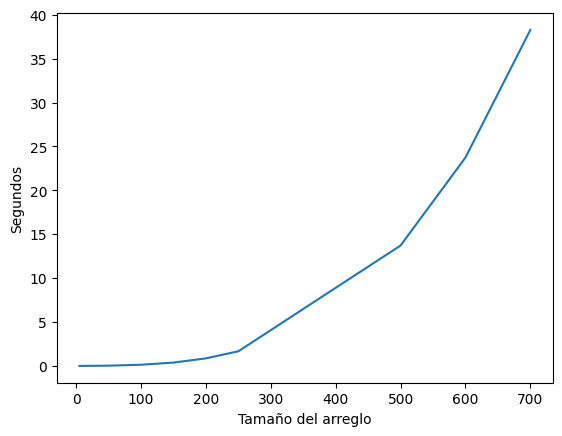

In [58]:
import matplotlib.pyplot as plt

elementos = [5, 50, 100, 150, 200, 250, 500, 600, 700]
tiempos = [
    0.0001258749998669373, # 5
    0.029696625000724453, # 50
    0.13427879200025927, # 100
    0.38113658299971576, # 150
    0.8614436249999926, # 200
    1.6700260000006892, # 250
    13.716189374999885, # 500
    23.735269709000022, # 600
    38.26982079100071 # 700
]
import matplotlib.pyplot as plt

plt.plot(elementos, tiempos)
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Segundos')